# Урок 8. Корреляционный анализ

**Корреляция** – это математический показатель, по которому можно судить о наличии статистической взаимосвязи между двумя и более случайными величинами.

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt

***
## Ковариация

**Ковариация** – это величина, определяющая зависимость  двух случайных величин.

$\displaystyle cov_{xy} = M(XY) - M(X) \cdot M(Y)$, где \
$\displaystyle M(XY) = \sum_{i=1}^{n} \sum_{j=1}^{m} x_i y_j p_{ij}$, \
$\displaystyle M(X) = \sum_{i=1}^{n}{x_i p_i}$, \
$\displaystyle M(Y) = \sum_{j=1}^{m}{y_j p_j}$

Масштаб ковариации зависит от дисперсии, поэтому  по ковариации нельзя судить о силе взаимосвязи СВ.

In [2]:
X = np.array([1.2, 1.6, 1.8, 1.8, 2.5, 2.6, 3, 3.3])
Y = np.array([27, 37, 42, 48, 57, 56, 77, 80])

In [3]:
np.mean(X*Y) - np.mean(X) * np.mean(Y)

11.662500000000023

In [4]:
np.cov(X, Y, ddof=0)

array([[  0.471875,  11.6625  ],
       [ 11.6625  , 301.      ]])

***
## Коэффициент корреляции

**Коэффициент корреляции** – это коэффициент, который показывает, насколько велика линейная зависимость между случайными величинами.

***
### Коэффициент корреляции Пирсона

$r_{xy} = \cfrac{cov_{xy}}{\sigma_x \sigma_y}$

In [5]:
cov = np.cov(X, Y, ddof=0)[1,0]
SDx = np.std(X, ddof=0)
SDy = np.std(Y, ddof=0)
cov / (SDx * SDy)

0.9785768205829909

In [6]:
cov = np.cov(X, Y, ddof=1)[1,0]
SDx = np.std(X, ddof=1)
SDy = np.std(Y, ddof=1)
cov / (SDx * SDy)

0.9785768205829907

In [7]:
np.corrcoef(X, Y)

array([[1.        , 0.97857682],
       [0.97857682, 1.        ]])

***
### Коэффициент корреляции Спирмена

Коэффициент корреляции Спирмена называют ранговым коэффициентом корреляции. Он также показывает тесноту линейной связи, но в отличии от коэффициента корреляции Пирсона не требует нормальности распределений случайных величин и применяется для количественных и  порядковых данных.

In [8]:
X = np.array([1.2, 1.6, 1.8, 1.8, 2.5, 2.6, 3, 3.3])
Y = np.array([27, 37, 42, 48, 57, 56, 77, 80])

In [9]:
n = X.shape[0]
df = pd.DataFrame({'X': X, 'Y': Y})
df['Xr'] = df['X'].rank()
df['Yr'] = df['Y'].rank()
df

,X,Y,Xr,Yr
0,1.2,27,1.0,1.0
1,1.6,37,2.0,2.0
2,1.8,42,3.5,3.0
3,1.8,48,3.5,4.0
4,2.5,57,5.0,6.0
5,2.6,56,6.0,5.0
6,3.0,77,7.0,7.0
7,3.3,80,8.0,8.0


In [10]:
np.corrcoef(df['Xr'], df['Yr'])

array([[1.        , 0.97007727],
       [0.97007727, 1.        ]])

In [11]:
stats.spearmanr(X, Y)

SpearmanrResult(correlation=0.9700772721497398, pvalue=6.548558831120599e-05)

***
### Условия применимости коэффициентов корреляции

| Коэффициент корреляции Пирсона | Коэффициент корреляции Спирмена |
| :--- | :--- |
| параметрический метод | непараметрический метод |
| нормальность | распределение может быть отличным от нормального |
| количественные данные | количественные и порядковые признаки |


***
### Интерпретация коэффициента корреляции

Коэффициент корреляции обозначается $r$ и принимает значения $[-1, 1]$. Теснота линейной взаимосвязи определяется по модулю, чем ближе по модулю к 1, тем сильнее линейная взаимосвязь. Знак показывает  прямая или обратная взаимосвязь между случайными величинами.

| Значение $r$ | Интерпретация линейной зависимости |
| --- | :--- |
| 0 - 0.1   | нет линейной зависимости |
| 0.1 - 0.3 | очень слабая |
| 0.3 - 0.5 | слабая |
| 0.5 - 0.7 | средняя (заметная) |
| 0.7 - 0.9 | сильная |
| 0.9 - 1   | очень сильная |

Т.е. коэффициент корреляции -1 и 1 показывают одинаково сильную линейную зависимость. Только одна из них будет обратная (-1), а другая прямая зависимость (1).

Прямая зависимость означает, что рост одной случайной величины сопровождается ростом другой случайной величины.
<img src="./img/image1.png" alt="image1" width="250"/>

Обратная зависимость означает, что с увеличением одной случайной величины уменьшается другая случайная величина. 
<img src="./img/image2.png" alt="image2" width="250"/>

И если коэффициент корреляции равен или близок к нулю, то это говорит лишь о том, что между СВ нет линейной зависимости, но возможна какая-то другая зависимость, поэтому в таком случае рекомендуется построить график.
<img src="./img/image3.png" alt="image3" width="250"/>
Одним из самых распространенных примеров из книг по статистики, который иллюстрирует справедливость вышеупомянутого факта, является квадратичная зависимость $y=x^2$. На графике четко видна параболла, но коэффициент корреляции показывает ноль.

In [12]:
x = np.linspace(-10, 10, 21)
y = x**2
np.corrcoef(x,y)

array([[ 1.00000000e+00, -3.07735001e-17],
       [-3.07735001e-17,  1.00000000e+00]])

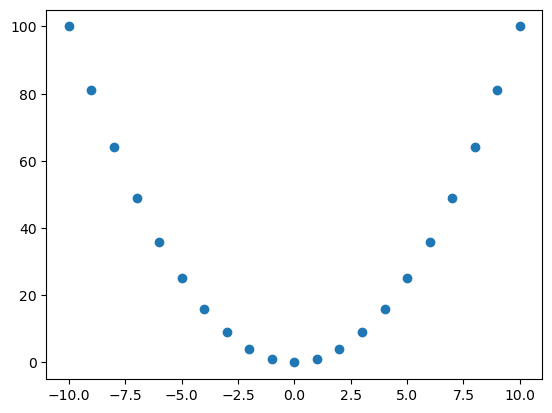

In [13]:
plt.scatter(x,y);

***
## Слабые стороны корреляционного анализа

1. То, что коэффициент корреляции показывает ноль при наличии, например, квадратичной зависимости можно уже отнести к недостаткам корреляционного анализа.

2. Еще одним недостатком может служить то, что случайные величины могут коррелировать по случайности.

3. Высокая корреляции двух величин может свидетельствовать о том, что есть третья скрытая переменная.

4. Можно перепутать причинно-следственную связи, т.е. что является причиной, а что следствием.

5. Коэффициент корреляции не показывает, как быстро изменяется зависимая переменная $y$ при изменении независимой переменной $x$.